# Datacamp - RNA-Seq with Bioconductor in R
RNA-Seq is an exciting next-generation sequencing method used for identifying genes and pathways underlying particular diseases or conditions. As high-throughput sequencing becomes more affordable and accessible to a wider community of researchers, the knowledge to analyze this data is becoming an increasingly valuable skill. Join us in learning about the RNA-Seq workflow and discovering how to identify which genes and biological processes may be important for your condition of interest! We will start the course with a brief overview of the RNA-Seq workflow with an emphasis on differential expression (DE) analysis. Starting with the counts for each gene, the course will cover how to prepare data for DE analysis, assess the quality of the count data, and identify outliers and detect major sources of variation in the data. The DESeq2 R package will be used to model the count data using a negative binomial model and test for differentially expressed genes. Visualization of the results with heatmaps and volcano plots will be performed and the significant differentially expressed genes will be identified and saved.

## Introduction to RNA-Seq theory and workflow
In this chapter we explore what we can do with RNA-Seq data and why it is exciting. We learn about the different steps and considerations involved in an RNA-Seq workflow.

### RNA-Seq Packages
We will be using DESeq2 for performing the differential expression analysis and additional R packages for data wrangling and plotting. Before we can run any analyses, we need to load the following packages `DESeq2`, `RColorBrewer`, `pheatmap`, and `tidyverse`.

In [1]:
# Install library for DESeq2
BiocManager::install("DESeq2")

# Install library for RColorBrewer
BiocManager::install("RColorBrewer")

# Install library for pheatmap
BiocManager::install("pheatmap")


'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Installing package(s) 'DESeq2'

also installing the dependencies 'annotate', 'genefilter', 'locfit', 'geneplotter', 'RcppArmadillo'




package 'annotate' successfully unpacked and MD5 sums checked
package 'genefilter' successfully unpacked and MD5 sums checked
package 'locfit' successfully unpacked and MD5 sums checked
package 'geneplotter' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'DESeq2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\recer\AppData\Local\Temp\Rtmp2L9qwm\downloaded_packages


Old packages: 'backports', 'brio', 'broom', 'cli', 'cpp11', 'crayon', 'DBI',
  'digest', 'dtplyr', 'fansi', 'fs', 'generics', 'glmnet', 'glue', 'jsonlite',
  'knitr', 'languageserver', 'magrittr', 'mvtnorm', 'openssl', 'permute',
  'pillar', 'pkgload', 'raster', 'Rcpp', 'readr', 'remotes', 'repr', 'rex',
  'rJava', 'rjson', 'rlang', 'rsconnect', 'rvest', 'sp', 'stringi', 'testthat',
  'tibble', 'tinytex', 'tzdb', 'uuid', 'vroom', 'withr', 'xfun', 'xgboost',
  'xml2', 'yaml', 'foreign', 'later', 'rpart'

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Warning message:
"package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'RColorBrewer'"
Old packages: 'backports', 'brio', 'broom', 'cli', 'cpp11', 'crayon', 'DBI',
  'digest', 'dtplyr', 'fansi', 'fs', 'generics', 'g

package 'pheatmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\recer\AppData\Local\Temp\Rtmp2L9qwm\downloaded_packages


Old packages: 'backports', 'brio', 'broom', 'cli', 'cpp11', 'crayon', 'DBI',
  'digest', 'dtplyr', 'fansi', 'fs', 'generics', 'glmnet', 'glue', 'jsonlite',
  'knitr', 'languageserver', 'magrittr', 'mvtnorm', 'openssl', 'permute',
  'pillar', 'pkgload', 'raster', 'Rcpp', 'readr', 'remotes', 'repr', 'rex',
  'rJava', 'rjson', 'rlang', 'rsconnect', 'rvest', 'sp', 'stringi', 'testthat',
  'tibble', 'tinytex', 'tzdb', 'uuid', 'vroom', 'withr', 'xfun', 'xgboost',
  'xml2', 'yaml', 'foreign', 'later', 'rpart'



In [3]:
# Load library for DESeq2
library("DESeq2")

# Load library for RColorBrewer
library("RColorBrewer")

# Load library for pheatmap
library("pheatmap")

# Load library for tidyverse
library("tidyverse")

### Exploring the raw count matrix
Let's explore the contents of the raw count matrix. The dataset smoc2_rawcounts has already been loaded for you using the `read.csv()` function.

In [13]:
# Read CSV read file
smoc2_rawcounts <- read.csv('data/smoc2_rawcounts.csv') 

In [14]:
# Explore the first six observations of smoc2_rawcounts
head(smoc2_rawcounts)

# Explore the structure of smoc2_rawcounts
str(smoc2_rawcounts)

,X,smoc2_fibrosis1,smoc2_fibrosis4,smoc2_normal1,smoc2_normal3,smoc2_fibrosis3,smoc2_normal4,smoc2_fibrosis2
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSMUSG00000102693,0,0,0,0,0,0,0
2,ENSMUSG00000064842,0,0,0,0,0,0,0
3,ENSMUSG00000051951,72,30,0,3,36,1,51
4,ENSMUSG00000102851,0,0,0,0,0,0,0
5,ENSMUSG00000103377,0,0,1,0,0,0,0
6,ENSMUSG00000104017,0,0,0,0,0,0,0


'data.frame':	47729 obs. of  8 variables:
 $ X              : chr  "ENSMUSG00000102693" "ENSMUSG00000064842" "ENSMUSG00000051951" "ENSMUSG00000102851" ...
 $ smoc2_fibrosis1: int  0 0 72 0 0 0 0 0 0 1 ...
 $ smoc2_fibrosis4: int  0 0 30 0 0 0 0 0 0 1 ...
 $ smoc2_normal1  : int  0 0 0 0 1 0 0 0 0 1 ...
 $ smoc2_normal3  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ smoc2_fibrosis3: int  0 0 36 0 0 0 0 0 0 1 ...
 $ smoc2_normal4  : int  0 0 1 0 0 0 0 0 0 0 ...
 $ smoc2_fibrosis2: int  0 0 51 0 0 0 0 0 0 1 ...


In [9]:
# Create genotype vector
genotype <- c("smoc2_oe", "smoc2_oe", "smoc2_oe", "smoc2_oe", "smoc2_oe", "smoc2_oe", "smoc2_oe")

# Create condition vector
condition <- c("fibrosis", "fibrosis", "fibrosis", "fibrosis", "normal", "normal", "normal")

# Create data frame
smoc2_metadata <- data.frame(genotype, condition)

# Assign the row names of the data frame
rownames(smoc2_metadata) <- c("smoc2_fibrosis1", "smoc2_fibrosis2", "smoc2_fibrosis3", "smoc2_fibrosis4", "smoc2_normal1", "smoc2_normal3", "smoc2_normal4")

In [10]:
smoc2_metadata 

,genotype,condition
,<chr>,<chr>
smoc2_fibrosis1,smoc2_oe,fibrosis
smoc2_fibrosis2,smoc2_oe,fibrosis
smoc2_fibrosis3,smoc2_oe,fibrosis
smoc2_fibrosis4,smoc2_oe,fibrosis
smoc2_normal1,smoc2_oe,normal
smoc2_normal3,smoc2_oe,normal
smoc2_normal4,smoc2_oe,normal


In [5]:
vignette("DESeq2")

starting httpd help server ...
 done



### Matching metadata and counts data
To perform any analysis with DESeq2, we need to create a DESeq2 object by providing the raw counts, metadata, and design formula. To do this, we need to read in the raw counts data and associated metadata we created previously, make sure the sample names are in the same order in both datasets, then create a DESeq2 object to use for differential expression analysis. We will use the design formula `~ condition` to test for differential expression between conditions (normal and fibrosis).

The `DESeq2` and `dplyr` libraries have been loaded for you, and the smoc2_rawcounts and smoc2_metadata files have been read in.

- Use the `match()` function to return the indices for how to reorder the columns of the counts data to match the order of the row names of the metadata. Assign the result to reorder_idx.
- Remember that when using the match() function, the first vector is in the order desired, while the second vector is the one to reorder.
- To create the DESeq2 object, we need to specify our reordered counts (reordered_smoc2_rawcounts) as the countData and our metadata (smoc2_metadata) as the colData.

- Reorder the columns of the count data with reorder_idx such that the column names match the order of the row names in the metadata.

- Create a DESeq2 object, dds_smoc2 using the `DESeqDataSetFromMatrix()` function using the metadata and reordered counts.

In [16]:
# Use the match() function to reorder the columns of the raw counts
reorder_idx <- match(rownames(smoc2_metadata), colnames(smoc2_rawcounts))
reorder_idx

[1] 2 8 6 3 4 5 7

In [17]:

# Reorder the columns of the count data
reordered_smoc2_rawcounts <- smoc2_rawcounts[ , reorder_idx]

# Create a DESeq2 object
dds_smoc2 <- DESeqDataSetFromMatrix(countData = reordered_smoc2_rawcounts,
                              colData = smoc2_metadata,
                              design = ~ condition)
dds_smoc2

Warning message in DESeqDataSet(se, design = design, ignoreRank):
"some variables in design formula are characters, converting to factors"


class: DESeqDataSet 
dim: 47729 7 
metadata(1): version
assays(1): counts
rownames: NULL
rowData names(0):
colnames(7): smoc2_fibrosis1 smoc2_fibrosis2 ... smoc2_normal3
  smoc2_normal4
colData names(2): genotype condition

### Normalizing counts with DESeq2
We have created the DESeq2 object and now wish to perform quality control on our samples. Therefore, we need to generate the normalized counts (normalized for library size, which is the total number of gene counts per sample, while accounting for library composition). To obtain the normalized counts, use the DESeq2 object and generate the normalized counts matrix.

In [20]:
# Determine the size factors to use for normalization
dds_smoc2 <- estimateSizeFactors(dds_smoc2)

# Show Size Factors
sizeFactors(dds_smoc2)

# Extract the normalized counts
smoc2_normalized_counts <- counts(dds_smoc2, normalized = TRUE)
smoc2_normalized_counts 

smoc2_fibrosis1 smoc2_fibrosis2 smoc2_fibrosis3 smoc2_fibrosis4   smoc2_normal1 
      1.4319832       1.1189642       1.2480024       1.0826799       0.7106482 
  smoc2_normal3   smoc2_normal4 
      0.7989734       0.8482426

smoc2_fibrosis1,smoc2_fibrosis2,smoc2_fibrosis3,smoc2_fibrosis4,smoc2_normal1,smoc2_normal3,smoc2_normal4
0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.000000
0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.000000
50.2799192,45.5778638,28.8460994,27.7090216,0.000000,3.754818,1.178908
0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.000000
0.0000000,0.0000000,0.0000000,0.0000000,1.407166,0.000000,0.000000
0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.000000
0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.000000
0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.000000
0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.000000
0.6983322,0.8936836,0.8012805,0.9236341,1.407166,0.000000,0.000000


### Hierarchical heatmap by condition
When performing quality assessment of our count data, we need to transform the normalized counts for better visualization of the variance for unsupervised clustering analyses. To assess the similarity of the `smoc2` samples using hierarchical heatmaps, transform the normalized counts and perform hierarchical clustering analysis. Assume all libraries have been loaded, the DESeq2 object created, and the size factors have been stored in the DESeq2 object, `dds_smoc2`.

- Transform the normalized counts from the dds_smoc2 object using the vst() function with the blind argument and save to vsd_smoc2.
- Extract the matrix of transformed normalized counts from the vsd_smoc2 object using the assay() function and save as vsd_mat_smoc2.
- Calculate the correlation values between samples and save to vsd_cor_smoc2.
- Create a heatmap of the correlation values using pheatmap() with an annotation bar designating condition from the smoc2_metadata data frame.

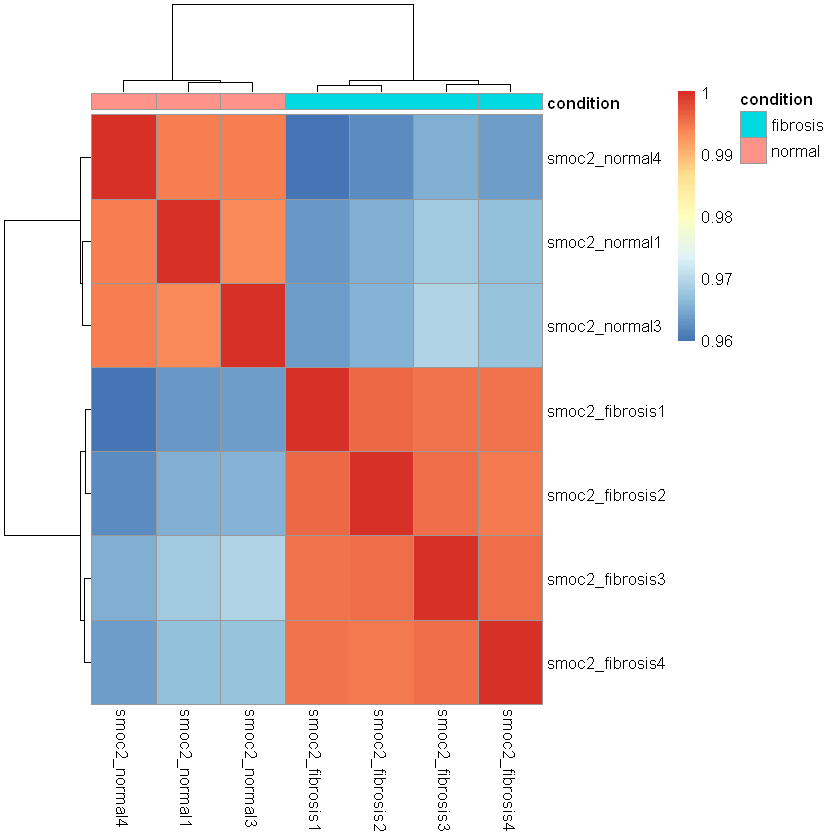

In [21]:
# Transform the normalized counts 
vsd_smoc2 <- vst(dds_smoc2, blind = TRUE)

# Extract the matrix of transformed counts
vsd_mat_smoc2 <- assay(vsd_smoc2)

# Compute the correlation values between samples
vsd_cor_smoc2 <- cor(vsd_mat_smoc2) 

# Plot the heatmap
pheatmap(vsd_cor_smoc2, annotation = select(smoc2_metadata, condition))

### PCA analysis

To continue with the quality assessment of our samples, in the first part of this exercise, we will perform PCA to look how our samples cluster and whether our condition of interest corresponds with the principal components explaining the most variation in the data. In the second part, we will answer questions about the PCA plot.

To assess the similarity of the `smoc2` samples using PCA, we need to transform the normalized counts then perform the PCA analysis. Assume all libraries have been loaded, the DESeq2 object created, and the size factors have been stored in the DESeq2 object, `dds_smoc2`.

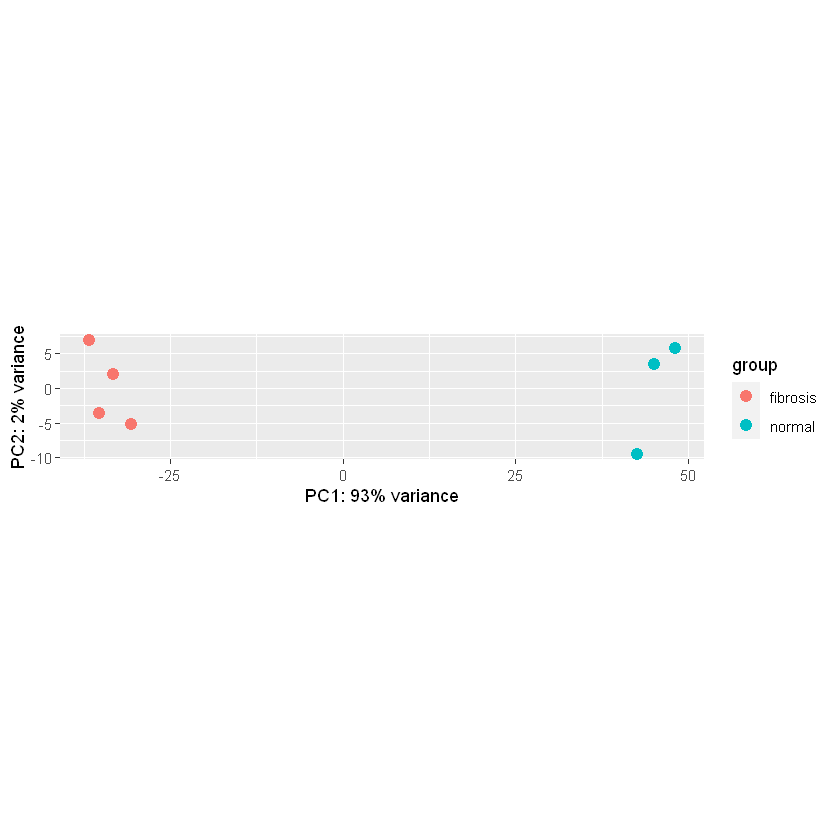

In [22]:
 # Transform the normalized counts 
vsd_smoc2 <- vst(dds_smoc2, blind = TRUE)

# Plot the PCA of PC1 and PC2
plotPCA(vsd_smoc2, intgroup="condition")